# Df 0 1 4_ C S V Data Source
This tutorial illustrates how use the RDataFrame in combination with a
RDataSource. In this case we use a TCsvDS. This data source allows to read
a CSV file from a RDataFrame.
As a result of running this tutorial, we will produce plots of the dimuon
spectrum starting from a subset of the CMS collision events of Run2010B.
Dataset Reference:
McCauley, T. (2014). Dimuon event information derived from the Run2010B
public Mu dataset. CERN Open Data Portal.
DOI: [10.7483/OPENDATA.CMS.CB8H.MFFA](http://opendata.cern.ch/record/700).




**Author:** Enric Tejedor  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:06 AM.</small></i>

Let's first create a rdf that will read from the csv file.
 The types of the columns will be automatically inferred.

In [1]:
auto fileNameUrl = "http://root.cern.ch/files/tutorials/df014_CsvDataSource_MuRun2010B.csv";
auto fileName = "df014_CsvDataSource_MuRun2010B_cpp.csv";
TFile::Cp(fileNameUrl, fileName);
auto tdf = ROOT::RDF::MakeCsvDataFrame(fileName);

[TFile::Cp] Total 14.46 MB	|====================| 100.00 % [90.0 MB/s]


Now we will apply a first filter based on two columns of the csv,
 and we will define a new column that will contain the invariant mass.
 Note how the new invariant mass column is defined from several other
 columns that already existed in the CSV file.

In [2]:
auto filteredEvents =
   tdf.Filter("Q1 * Q2 == -1")
      .Define("m", "sqrt(pow(E1 + E2, 2) - (pow(px1 + px2, 2) + pow(py1 + py2, 2) + pow(pz1 + pz2, 2)))");

Next we create a histogram to hold the invariant mass values and we draw it.

In [3]:
auto invMass =
   filteredEvents.Histo1D({"invMass", "CMS Opendata: #mu#mu mass;#mu#mu mass [GeV];Events", 512, 2, 110}, "m");

auto c = new TCanvas();
c->SetLogx();
c->SetLogy();
invMass->DrawClone();

We will now produce a plot also for the j/psi particle. we will plot
 on the same canvas the full spectrum and the zoom in the J/psi particle.
 First we will create the full spectrum histogram from the invariant mass
 column, using a different histogram model than before.

In [4]:
auto fullSpectrum =
   filteredEvents.Histo1D({"Spectrum", "Subset of CMS Run 2010B;#mu#mu mass [GeV];Events", 1024, 2, 110}, "m");

Next we will create the histogram for the j/psi particle, applying first
 the corresponding cut.

In [5]:
double jpsiLow = 2.95;
double jpsiHigh = 3.25;
auto jpsiCut = [jpsiLow, jpsiHigh](double m) { return m < jpsiHigh && m > jpsiLow; };
auto jpsi =
   filteredEvents.Filter(jpsiCut, {"m"})
      .Histo1D({"jpsi", "Subset of CMS Run 2010B: J/#psi window;#mu#mu mass [GeV];Events", 128, jpsiLow, jpsiHigh},
               "m");

input_line_66:4:1: warning: captures will be by reference, not copy
auto jpsiCut = [jpsiLow, jpsiHigh](double m) { return m < jpsiHigh && m > jpsiLow; };
^


Finally we draw the two histograms side by side.

In [6]:
auto dualCanvas = new TCanvas("DualCanvas", "DualCanvas", 800, 512);
dualCanvas->Divide(2, 1);
auto leftPad = dualCanvas->cd(1);
leftPad->SetLogx();
leftPad->SetLogy();
fullSpectrum->DrawClone("Hist");
dualCanvas->cd(2);
jpsi->DrawClone("HistP");

return 0;

Draw all canvases 

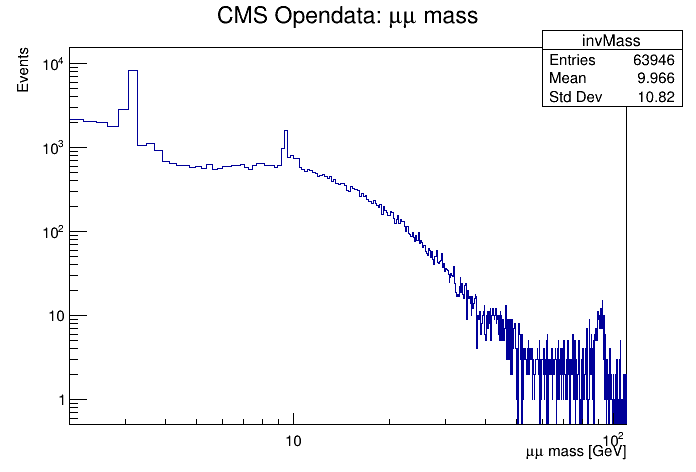

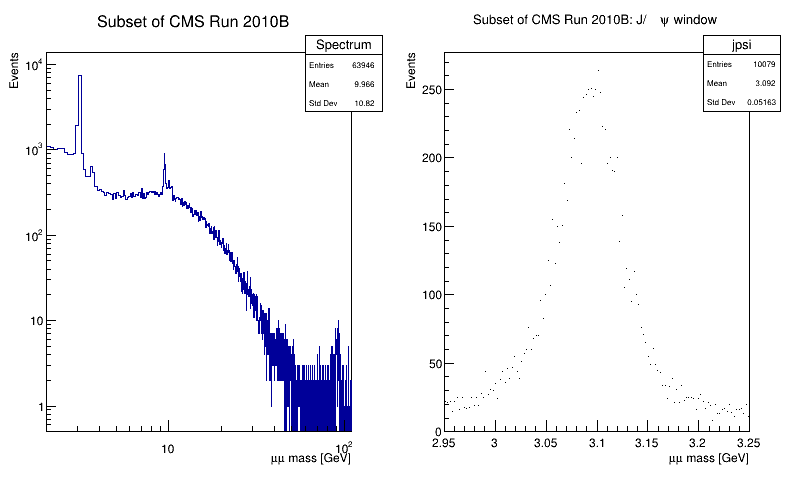

In [7]:
gROOT->GetListOfCanvases()->Draw()